In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# For decision tree visualization
import graphviz 

In [2]:

data = pd.read_csv("apple_quality.csv", index_col = 0)
data = data.iloc[:-1]

In [3]:
data.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [4]:
data['Size'] = data['Size'].fillna(data['Size'].mean())
data["Quality"] = data["Quality"].fillna("bad")
data = pd.get_dummies(data=data, columns=["Quality"], drop_first=True)

data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_good
A_id,,,,,,,,
0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,True
1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,True
2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,False
3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,True
4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,True


In [5]:


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
clf = DecisionTreeClassifier(max_depth=2) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [11]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy: 0.69375
              precision    recall  f1-score   support

       False       0.73      0.63      0.67       401
        True       0.67      0.76      0.71       399

    accuracy                           0.69       800
   macro avg       0.70      0.69      0.69       800
weighted avg       0.70      0.69      0.69       800



In [7]:
scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", scores.mean())

Cross-validation scores: 0.6759999999999999


In [8]:
importance = clf.feature_importances_
for i, j in enumerate(importance):
    print(f'Feature: {data.columns[i]}, Score: {j:.2f}')

Feature: Size, Score: 0.00
Feature: Weight, Score: 0.12
Feature: Sweetness, Score: 0.00
Feature: Crunchiness, Score: 0.00
Feature: Juiciness, Score: 0.37
Feature: Ripeness, Score: 0.51
Feature: Acidity, Score: 0.00


In [9]:
# dot_data = export_graphviz(clf, out_file=None, feature_names=data.columns[:-1], class_names=["Good", "Bad"], filled=True, rounded=True)
# graph = graphviz.Source(dot_data)
# # graph.render("apple_tree")
# graph

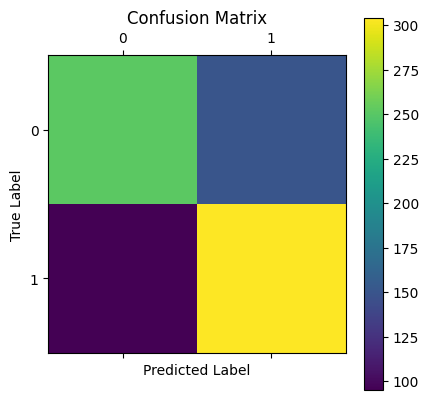

In [12]:
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()